In [1]:
PROJECT_PATH = '../..'
DATASET_PATH = '/home/swei20/cancerHH/AceCanZ/runs/test/testBulkVecs.txt'
# DATASET_PATH = '/scratch/ceph/dobos/data/pfsspec/train/stellar/grid/bosz_hires_test'

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [3]:
sys.path.insert(0, PROJECT_PATH)

In [4]:
os.getcwd()

'/home/swei20/cancerHH/AceCanZ/code/cancer/nb'

In [5]:
from cancer.prepro.data.bulk import Bulk
# from pfsspec.obsmod.spectrum import Spectrum

In [6]:
vecs=np.loadtxt(DATASET_PATH)

In [9]:
vecs.shape

(240000, 8)

In [11]:
len(vecs[0])

8

In [93]:
import logging
import numpy as np
import pandas as pd
import collections

class Bulk():
    def __init__(self, vecs):
        self.vecs=vecs
        self.nDim=len(vecs[0])
    
    def get_intensity(self):
        intensity = (np.sum(self.vecs**2, axis = 1))**0.5
        return intensity
    
    def get_cutoff(self, intensity, N_bins = 100, N_sigma = 3):
        para = np.log(intensity[intensity > 1])
        (x,y) = np.histogram(para, bins = N_bins)
        y = (y[1]-y[0])/2 + y[:-1]
        assert len(x) == len(y)
        x_max =  np.max(x)
        x_half = x_max//2
        mu = y[x == x_max]
        sigma = abs(y[abs(x - x_half).argmin()] -mu)
        cutoff_log = N_sigma* sigma + mu
        cutoff = np.exp(cutoff_log).round()
        return cutoff
    
    def get_min_max_norm(self, df):
        vmin,vmax=df.min().min(), df.max().max()
        df_norm=((df-vmin)/(vmax-vmin))
        assert ((df_norm>=0) & (df_norm<=1)).all().all()
        return df_norm

    def get_unit_ball(self, intensity, cut):
        mask = intensity > cut
        logging.info('stream length m = {}'.format(np.sum(mask)))
        mask=mask.astype('bool')
        intensityCut=intensity[mask]
        df_pca=pd.DataFrame(self.vecs[mask],columns=[f'd{i}' for i in range(self.nDim)])
        df_unit= np.divide(df_pca, intensityCut[:,None])
        df_norm=self.get_min_max_norm(df_unit)
        return df_norm, mask
    
    def get_unit_ball_2(self, intensity, cut):
        mask = intensity > cut
        logging.info('stream length m = {}'.format(np.sum(mask)))
        mask=mask.astype('bool')
        intensityCut=intensity[mask]
        df_pca=pd.DataFrame(self.vecs[mask],columns=[f'd{i}' for i in range(self.nDim)])
        df_uni= np.divide(df_pca, intensityCut[:,None])
        df_norm=get_minmax_pd(df_uni,r=r, vmin=None, vmax=None)
        if ONPCA:
            df_p2=get_col_norm_pd(df_pca[[1,2]],r=r,w=False,std=False)
            df_norm=pd.concat([df_p2,df_norm],axis=1)
        if ONINT: 
            intensityCut=(intensityCut-np.mean(intensityCut))/np.std(intensityCut)
            df_inten=pd.DataFrame(intensityCut, columns=['int'])
            df_inten=get_col_norm_pd(df_inten,r=r,w=False,std=False)
            df_norm=pd.concat([df_inten,df_norm],axis=1)
        ftr_len=len(df_norm.keys())
        print(df_norm)
        df_norm=pd.DataFrame(df_norm.values, columns=list(range(ftr_len)))
        return df_norm, mask, ftr_len

In [94]:
bulk= Bulk(vecs)

In [96]:
def run_step_ball(self):
    bulk=Bulk(self.vecs)
    intensity=bulk.get_intensity()
    if self.cutoff is None:
        self.cutoff = bulk.get_cutoff(intensity)
        pickle.dump(cut,open(f'{self.out}/cutoff.txt','wb'))
    logging.info(" cutoff @:  {}".format(self.cutoff))
    return intensity
#     bulk.get_unit_ball(intensity, self.cutoff)

In [105]:
class merp():
    vecs=vecs
    cutoff=300
    nDim=8
    get_min_max_norm=bulk.get_min_max_norm
self=merp()    

In [98]:
intensity=run_step_ball(self)

In [99]:
intensity.shape

(240000,)

In [100]:
cut=300

In [58]:
def get_unit_ball(self, intensity, cut):
    mask = intensity > cut
    logging.info('stream length m = {}'.format(np.sum(mask)))
    mask=mask.astype('bool')
    intensityCut=intensity[mask]
    df_pca=pd.DataFrame(self.vecs[mask],columns=[f'd{i}' for i in range(self.nDim)])
    df_unit= np.divide(df_pca, intensityCut[:,None])
    df_norm=self.get_min_max_norm(df_unit)
    return df_norm, mask


In [ ]:
def get_minmax_pd(df,r=0.01, vmin=None, vmax=None): 
    if vmin is None: vmin=np.min(df.quantile(r))
    if vmax is None: vmax=np.max(df.quantile(1-r))
    print('full min max',vmin,vmax )
    df_norm=((df-vmin)/(vmax-vmin)).clip(0,1)
    return df_norm

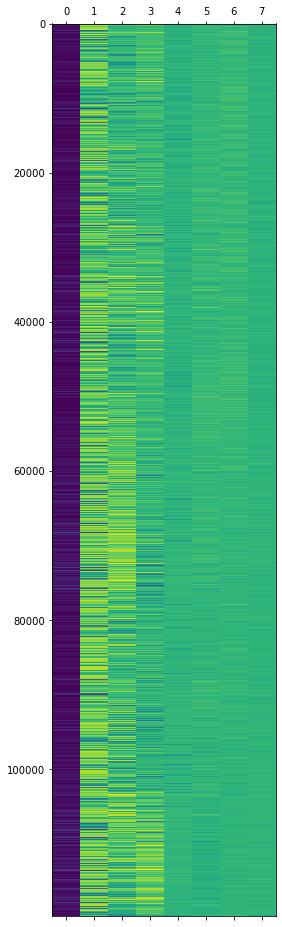

In [110]:
plt.matshow(df_norm, aspect='auto')

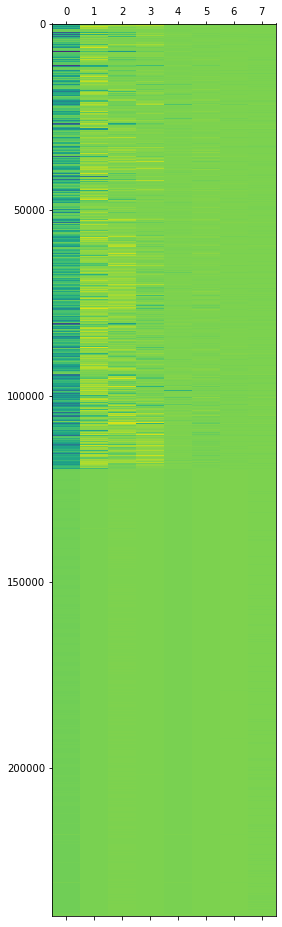

In [16]:
plt.matshow(vecs, aspect='auto')

In [67]:
21590016/8/2

1349376.0

In [69]:
vecs.reshape([2,120000,8])

array([[[-1.87693111e+03,  6.52560523e+02, -4.56831015e+01, ...,
          4.38896154e+01, -5.37359559e+00,  2.36737335e+01],
        [-1.84941826e+03,  6.35793432e+02, -3.88695559e+01, ...,
          4.36853699e+01, -4.81026918e+00,  2.42646334e+01],
        [-1.80261584e+03,  6.07067484e+02, -2.89233222e+01, ...,
          4.24540503e+01, -3.54297262e+00,  2.48704392e+01],
        ...,
        [-2.01557364e+02, -1.96218408e+02,  2.81443681e+01, ...,
         -8.15110172e+00, -1.59010492e+00, -1.08358121e+00],
        [-9.54013458e+01, -9.39212404e+01,  1.23074195e+01, ...,
         -3.92536374e+00, -1.25683210e+00, -4.74096922e-01],
        [-4.39473292e+01, -4.46805283e+01,  5.83392998e+00, ...,
         -2.05624969e+00, -6.08360826e-01,  2.04494770e-01]],

       [[-2.58074641e+02, -2.14236260e+01,  1.02073260e+01, ...,
          1.57146992e+01,  2.52817189e+01, -4.75134350e+00],
        [-2.58994485e+02, -1.97003400e+01,  8.47914530e+00, ...,
          1.51254755e+01,  2.55126337e

In [111]:
df_norm

,d0,d1,d2,d3,d4,d5,d6,d7
0,0.036596,0.868801,0.639078,0.653557,0.661895,0.668548,0.652340,0.661897
1,0.035798,0.866671,0.641113,0.652613,0.659568,0.668713,0.652500,0.662220
2,0.034410,0.862804,0.644165,0.651797,0.655532,0.668703,0.652890,0.662658
3,0.033010,0.858737,0.646332,0.652100,0.650837,0.667854,0.653351,0.662625
4,0.031809,0.855108,0.647007,0.655732,0.647505,0.666643,0.653927,0.661982
...,...,...,...,...,...,...,...,...
119767,0.050383,0.496367,0.759212,0.775401,0.559224,0.664631,0.708122,0.625516
119768,0.049848,0.497963,0.756301,0.764596,0.550691,0.664984,0.719414,0.627048
119769,0.051292,0.494458,0.757838,0.770054,0.551525,0.661497,0.713848,0.626769
119770,0.051579,0.491621,0.759192,0.769517,0.554650,0.661283,0.712302,0.625155


In [112]:
from util.prepro import get_encode_stream

In [114]:
stream1D=get_encode_stream(df_norm, 22,'uint64')

samples: 119772 ftrs: 8 base: 22


In [115]:
stream1D

array([36583915281, 36583915281, 36583915765, ..., 34202491357,
       34202491357, 34202491357], dtype=uint64)

In [117]:
a=None

In [118]:
if a:
    return 1
else:
    return 3

SyntaxError: 'return' outside function (<ipython-input-118-36a3bade4178>, line 2)